In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.insert(0, "/Users/jin/Programming/Machine_Learning/All-about-Market/trading/Jeong/machine_trade/code")
import author
import model
import eval_model
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
engine = author.test_engine


In [2]:
engine = author.processed_engine
query = """
SELECT * FROM `BTCUSD_1d` 
JOIN QQQ_1d ON BTCUSD_1d.time = QQQ_1d.time 
JOIN TLT_1d ON BTCUSD_1d.time = TLT_1d.time
JOIN USDTUSD_1d ON BTCUSD_1d.time = USDTUSD_1d.time
"""
#서버에서 데이터를 가져온다
df = pd.read_sql(query, engine)

In [3]:
#겹치는 컬럼 제거
time = df['time'].iloc[:,0]
df.drop('time',axis=1,inplace=True)
#결측치 제거
df.bfill(inplace=True)
df.index = time
column_names = []
#컬럼 리네임
for t in ["BTC","QQQ","TLT","USDT"]:
    for i in range(9):
        column_names.append(t +"_"+ df.columns[i])
df.columns = column_names


In [4]:
df.columns

Index(['BTC_Price', 'BTC_Gap', 'BTC_Rsi', 'BTC_Macd', 'BTC_Macd_Signal',
       'BTC_Vwap', 'BTC_Volume', 'BTC_Fast_k', 'BTC_Fast_d', 'QQQ_Price',
       'QQQ_Gap', 'QQQ_Rsi', 'QQQ_Macd', 'QQQ_Macd_Signal', 'QQQ_Vwap',
       'QQQ_Volume', 'QQQ_Fast_k', 'QQQ_Fast_d', 'TLT_Price', 'TLT_Gap',
       'TLT_Rsi', 'TLT_Macd', 'TLT_Macd_Signal', 'TLT_Vwap', 'TLT_Volume',
       'TLT_Fast_k', 'TLT_Fast_d', 'USDT_Price', 'USDT_Gap', 'USDT_Rsi',
       'USDT_Macd', 'USDT_Macd_Signal', 'USDT_Vwap', 'USDT_Volume',
       'USDT_Fast_k', 'USDT_Fast_d'],
      dtype='object')

In [5]:
df

,BTC_Price,BTC_Gap,BTC_Rsi,BTC_Macd,BTC_Macd_Signal,BTC_Vwap,BTC_Volume,BTC_Fast_k,BTC_Fast_d,QQQ_Price,...,TLT_Fast_d,USDT_Price,USDT_Gap,USDT_Rsi,USDT_Macd,USDT_Macd_Signal,USDT_Vwap,USDT_Volume,USDT_Fast_k,USDT_Fast_d
time,,,,,,,,,,,,,,,,,,,,,
2017-11-22,8253.549805,0.028084,68.346880,445.988842,519.541131,3921.269410,3633530112,6.293342,10.473278,151.023880,...,-276.390668,1.000150,0.010688,37.588800,-1.441462e-03,-0.002235,1.005206,4.998120e+08,5.322139,5.276805
2017-11-24,8253.690430,0.054557,66.270356,470.049094,514.700552,4003.453668,5058610176,10.954248,8.306206,151.576813,...,-277.116082,1.002330,0.019358,47.062782,-1.837555e-03,-0.002416,1.004272,8.486280e+08,10.357911,6.183127
2017-11-27,9818.349609,0.049786,78.260785,553.156253,708.616645,4171.184742,5653320192,14.625938,14.380541,151.508881,...,-276.565486,1.001290,0.022085,45.820690,-1.647744e-03,-0.001303,1.004365,7.844370e+08,9.836470,14.072735
2017-11-28,10058.799805,0.039995,79.556724,599.838524,786.567609,4245.917509,6348819968,9.238198,12.666427,151.896881,...,-275.123357,1.000140,0.010473,44.352392,-1.601983e-03,-0.001419,1.004122,7.947640e+08,12.721461,13.622220
2017-11-29,9888.610352,0.199600,76.098837,644.890859,825.100201,4373.479924,11568799744,6.625017,10.652623,149.248734,...,-272.034415,0.990606,0.097143,34.486139,-1.732481e-03,-0.002254,1.002662,1.672120e+09,37.689587,21.645748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,45538.675781,0.046739,60.429847,1275.360994,1689.249727,27597.792681,33327427106,1.996777,6.161514,362.540009,...,11.009577,1.000304,0.000534,46.632025,1.999972e-06,-0.000006,1.001093,9.048985e+10,18.269432,16.701748
2022-04-01,46281.644531,0.049841,62.831393,1355.077972,1673.945882,27614.645619,38162644287,25.320883,12.547970,361.850006,...,22.450085,1.000358,0.000411,49.035785,2.184059e-07,-0.000007,1.001092,9.225051e+10,24.152448,19.185315
2022-04-04,46622.675781,0.034381,63.209030,1467.251023,1566.391501,27653.141215,32499785455,19.427733,12.917409,369.299988,...,19.211212,1.000228,0.000299,43.468645,-8.350547e-06,-0.000024,1.001089,7.982091e+10,13.068415,15.143953


In [6]:
#중복 행 제거
df = df[~df.index.duplicated()]
df

,BTC_Price,BTC_Gap,BTC_Rsi,BTC_Macd,BTC_Macd_Signal,BTC_Vwap,BTC_Volume,BTC_Fast_k,BTC_Fast_d,QQQ_Price,...,TLT_Fast_d,USDT_Price,USDT_Gap,USDT_Rsi,USDT_Macd,USDT_Macd_Signal,USDT_Vwap,USDT_Volume,USDT_Fast_k,USDT_Fast_d
time,,,,,,,,,,,,,,,,,,,,,
2017-11-22,8253.549805,0.028084,68.346880,445.988842,519.541131,3921.269410,3633530112,6.293342,10.473278,151.023880,...,-276.390668,1.000150,0.010688,37.588800,-1.441462e-03,-0.002235,1.005206,4.998120e+08,5.322139,5.276805
2017-11-24,8253.690430,0.054557,66.270356,470.049094,514.700552,4003.453668,5058610176,10.954248,8.306206,151.576813,...,-277.116082,1.002330,0.019358,47.062782,-1.837555e-03,-0.002416,1.004272,8.486280e+08,10.357911,6.183127
2017-11-27,9818.349609,0.049786,78.260785,553.156253,708.616645,4171.184742,5653320192,14.625938,14.380541,151.508881,...,-276.565486,1.001290,0.022085,45.820690,-1.647744e-03,-0.001303,1.004365,7.844370e+08,9.836470,14.072735
2017-11-28,10058.799805,0.039995,79.556724,599.838524,786.567609,4245.917509,6348819968,9.238198,12.666427,151.896881,...,-275.123357,1.000140,0.010473,44.352392,-1.601983e-03,-0.001419,1.004122,7.947640e+08,12.721461,13.622220
2017-11-29,9888.610352,0.199600,76.098837,644.890859,825.100201,4373.479924,11568799744,6.625017,10.652623,149.248734,...,-272.034415,0.990606,0.097143,34.486139,-1.732481e-03,-0.002254,1.002662,1.672120e+09,37.689587,21.645748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,45538.675781,0.046739,60.429847,1275.360994,1689.249727,27597.792681,33327427106,1.996777,6.161514,362.540009,...,11.009577,1.000304,0.000534,46.632025,1.999972e-06,-0.000006,1.001093,9.048985e+10,18.269432,16.701748
2022-04-01,46281.644531,0.049841,62.831393,1355.077972,1673.945882,27614.645619,38162644287,25.320883,12.547970,361.850006,...,22.450085,1.000358,0.000411,49.035785,2.184059e-07,-0.000007,1.001092,9.225051e+10,24.152448,19.185315
2022-04-04,46622.675781,0.034381,63.209030,1467.251023,1566.391501,27653.141215,32499785455,19.427733,12.917409,369.299988,...,19.211212,1.000228,0.000299,43.468645,-8.350547e-06,-0.000024,1.001089,7.982091e+10,13.068415,15.143953


In [7]:
model_class = [Lasso(alpha=10, fit_intercept=True, random_state=1024), 
                    Ridge(alpha=10, solver="sparse_cg", random_state=1024, fit_intercept=True)]
                    
lasso_model = model.MyModel()
lasso_model.create_linear_model(model_class[0], df,target="BTC_Price",outlier=True)

ridge_model = model.MyModel()
ridge_model.create_linear_model(model_class[1], df,target="BTC_Price",outlier=True)

rf_model = model.MyModel()
rf_model.create_random_forest(df, target="BTC_Price", outlier=True)


mse: 314743526.5156653, alpha: 10000
mse: 314743526.5156653, alpha: 3000
mse: 314743526.5156653, alpha: 1000
mse: 314743526.5156653, alpha: 300
mse: 314743526.5156653, alpha: 100
mse: 314743526.5156653, alpha: 30
mse: 314743526.5156653, alpha: 10
mse: 185995845.5424597, alpha: 1
mse: 26993819.424802005, alpha: 10000
mse: 22983543.799210154, alpha: 3000
mse: 29958874.781621296, alpha: 1000
mse: 68637826.93472417, alpha: 300
mse: 145390981.94489393, alpha: 100
mse: 263331340.10111824, alpha: 30
mse: 371736287.17184913, alpha: 10
mse: 480537591.40657276, alpha: 1
param: depth mse: 22052939.63548254, alpha: 2
param: depth mse: 3910260.048512287, alpha: 7
param: depth mse: 2741207.931093119, alpha: 12
param: depth mse: 2887057.7816583384, alpha: 17
param: depth mse: 2884484.2442660346, alpha: 22
param: depth mse: 2880568.2986779492, alpha: 27
param: depth mse: 2880568.2986779492, alpha: 32
param: depth mse: 2880568.2986779492, alpha: 37
param: depth mse: 2880568.2986779492, alpha: 42
param:

In [8]:
lasso_pred = lasso_model.model.predict(lasso_model.X)
ridge_pred = ridge_model.model.predict(ridge_model.X)
rf_pred = rf_model.model.predict(rf_model.X)

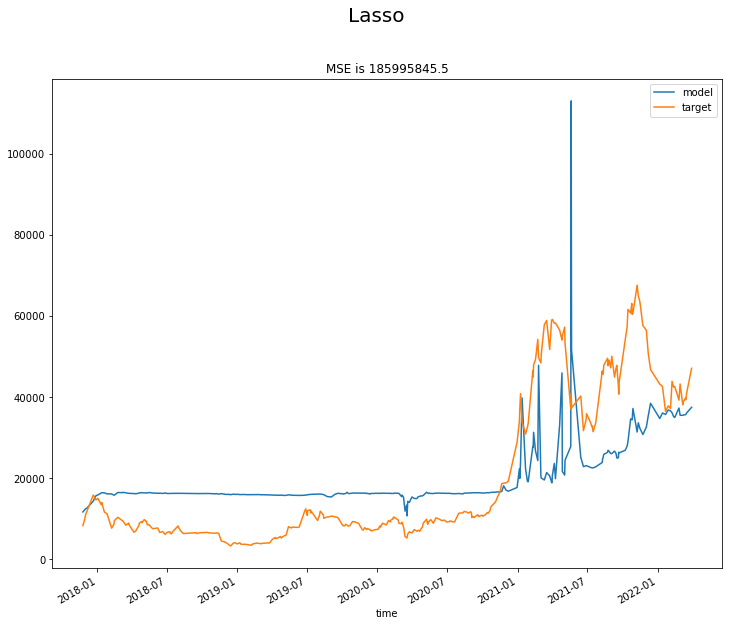

In [9]:
eval_model.visualize_plot(lasso_pred,lasso_model.y,"Lasso")

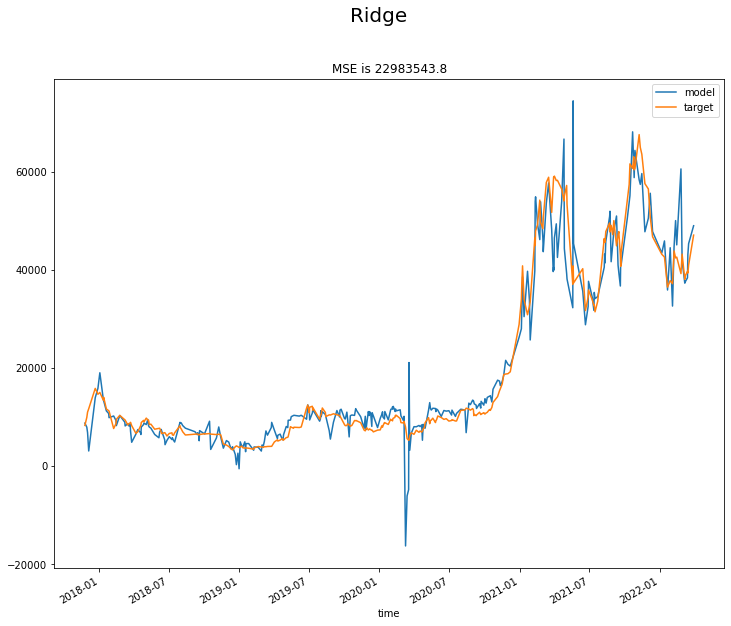

In [10]:
eval_model.visualize_plot(ridge_pred,ridge_model.y,"Ridge")

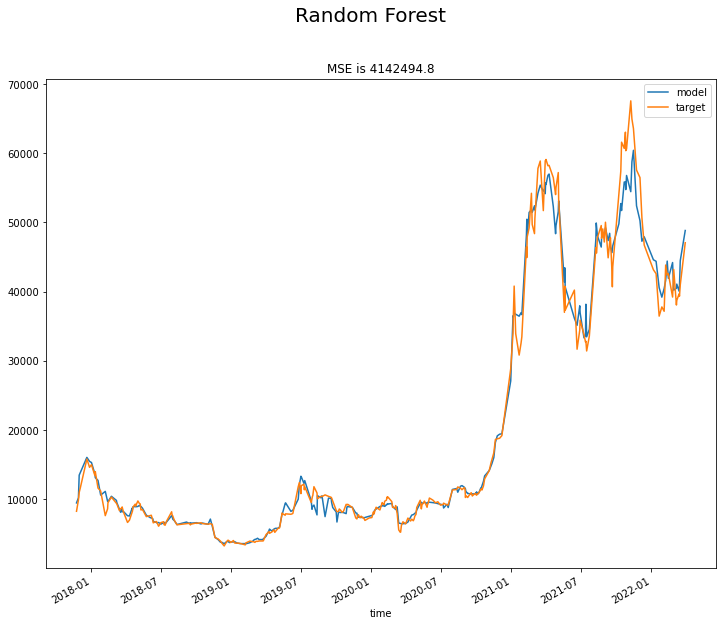

In [11]:
eval_model.visualize_plot(rf_pred, rf_model.y, "Random Forest")

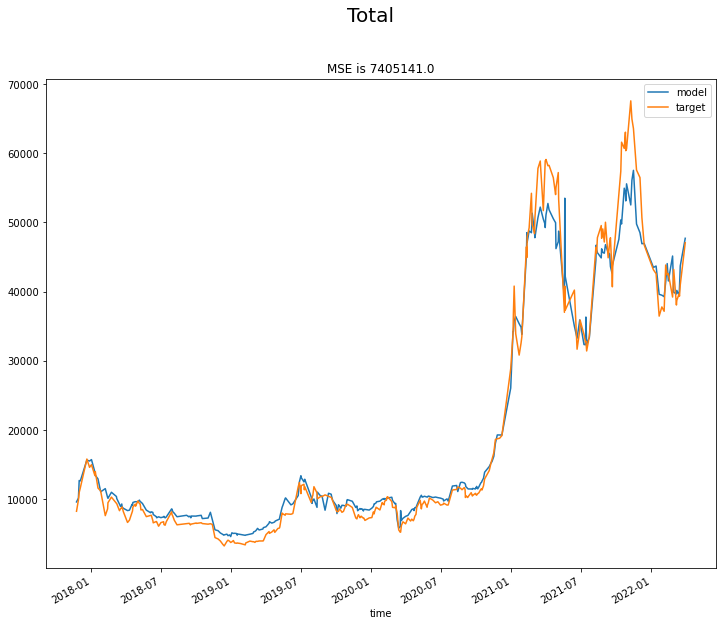

In [12]:
pred = ridge_pred * 0.1 + lasso_pred * 0.1 + rf_pred * 0.8
eval_model.visualize_plot(pred, ridge_model.y, "Total")

리쏘 릿지 랜덤 포레스트를 1:2:7의 비율로 활용한다. (오류의 크기를 기준으로 설정)

In [13]:
X = df.drop("BTC_Price", axis=1)
y = df["BTC_Price"]
total_pred = ridge_model.model.predict(X) * 0.2 + rf_model.model.predict(X) * 0.7 + lasso_model.model.predict(X) * 0.1


전체 데이터에 대한 릿지와 랜덤 포레스트의 평균 예측 값을 그리면 아래와 같다.

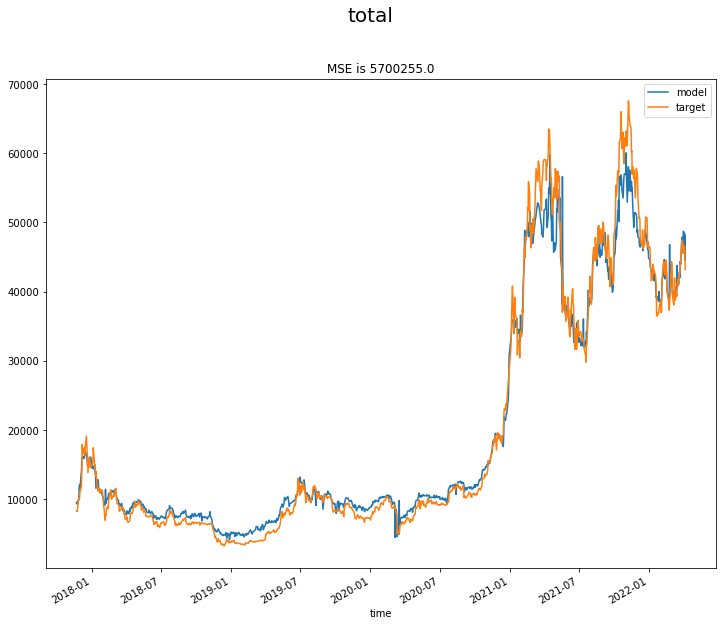

In [14]:
eval_model.visualize_plot(total_pred, y, "total")

평균 오차율을 확인해보자


(0.0, 100.0)

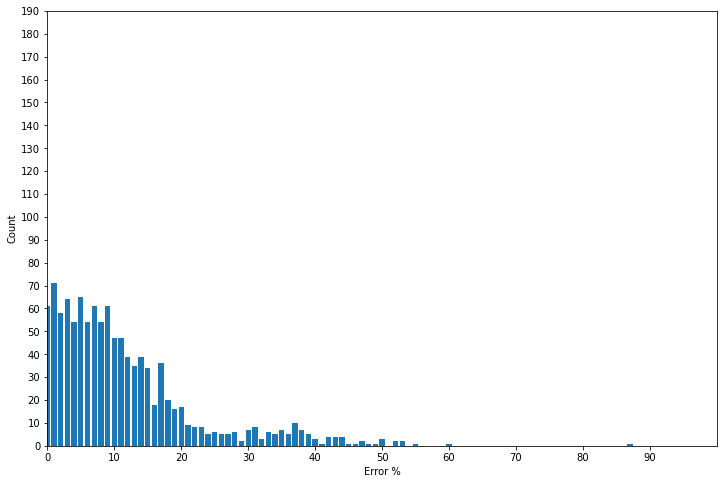

In [15]:
error = abs(df['BTC_Price'] - total_pred) / df['BTC_Price'] * 100
error_mean = error.mean()
error_var = error.var()
error = error.astype(int)
cnts = error.value_counts()
cnts.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(12,8))
plt.bar(cnts.index, cnts.values)
plt.ylabel("Count")
plt.xlabel("Error %")
plt.xticks(range(0,100,10))
plt.yticks(range(0,200,10))
plt.xlim(0,100)

오차가 대체적으로 15%안에 분포하는 것을 확인할 수 있다.

신뢰구간을 구해 범위를 파악하고 싶었지만, 아무런 의미 없는 크기의 신뢰 구간이 나왔다.

In [16]:
import numpy as np
np.sqrt(error_var) * 2

21.57689610654924

신뢰구간이 무척 넓기에 유의미한 배팅을 할 수는 없고 과거 데이터를 기반으로 해 가장 수익률이 높은 경우를 분석한다.

In [17]:
error_mean #평균 오차율

11.880795205244246

In [18]:
pct_pred = (total_pred - df['BTC_Price']) / df['BTC_Price'] * 100 #내일 코인이 몇 % 오를지를 계산해준다.

매매 로직은 무척 단순하다. 내일 비트코인 예측 값이 i % 이상일 것이라 예측 되면 종가를 기준으로 매수하고 다음날 종가에 곧장 매도한다.

In [19]:
def get_threshold(days=0): #현재로 부터 과거 몇일의 수익
    result = []
    for i in range(-5, 10):
        buy_point = pct_pred[pct_pred > i] #예측 값이 i% 이상 상승을 말하면 매수한다.
        buy_value = df['BTC_Price'][(df['BTC_Price'].index).isin(buy_point.index)]
        sell_dates = [df.index.get_loc(i) + 1 for i in buy_value.index[:-1]] #매수 다음날 바로 매도한다.
        profit = (df['BTC_Price'].iloc[sell_dates] - buy_value.values[:-1]) / buy_value.values[:-1] * 100
        seed = 1000 #처음 seed
        seed_record = [] #profit 저장용
        for p in profit[-days:]:
            seed = seed * (1 + (p / 100))
            seed_record.append(seed)
        result.append((i,seed_record))
    return result
result = get_threshold(100)

과거 약 1년 (100일이지만 주식시장이 열리는 날만을 파악했으므로 실상 1년 정도 된다)을 기준으로 수익률 곡선을 그려본다.

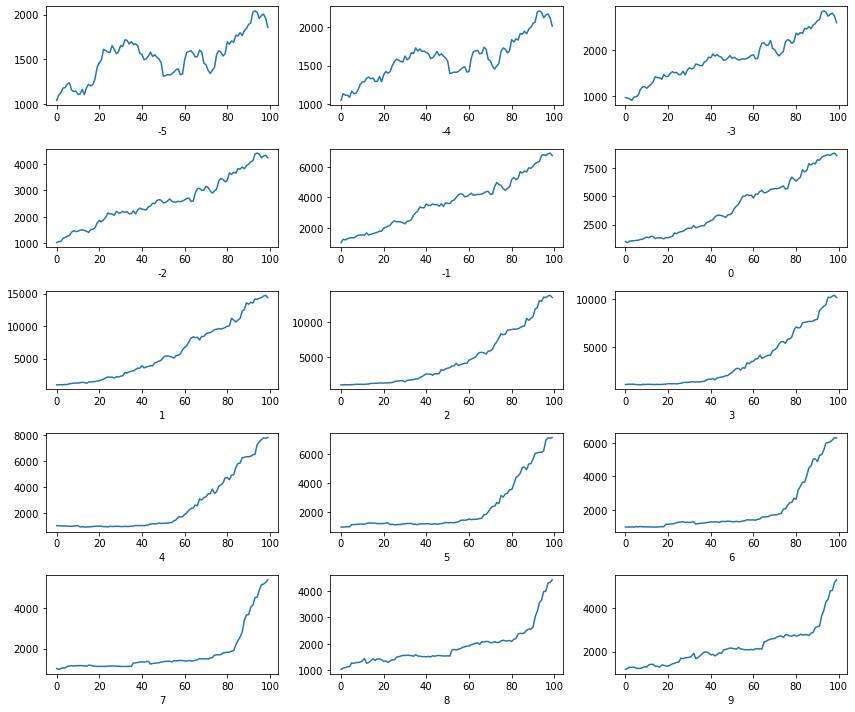

In [20]:
fig,axes = plt.subplots(5,3,figsize=(12,10))
for i, r in enumerate(result, start=1):
    thereshold, value = r
    plt.subplot(5,3,i)
    plt.plot(value)
    plt.xlabel(thereshold)
plt.tight_layout()

2%를 기준으로 매매를 반복했을 때 가장 수익률이 높았다는 것을 확인할 수 있다.
실제 어떻게 매매를 진행하는지 직접 확인해보자

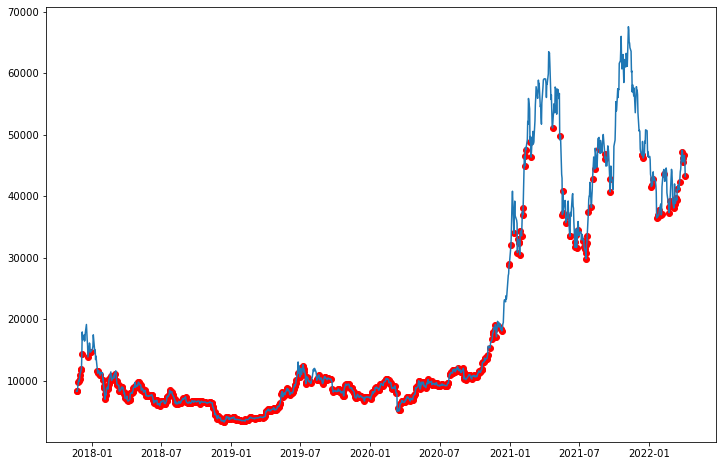

In [36]:
buy_point = pct_pred[pct_pred > 1] #1%이상 오를 것이라고 예측한 날들
buy_value = df['BTC_Price'][(df['BTC_Price'].index).isin(buy_point.index)]
plt.figure(figsize=(12,8))
plt.plot(df['BTC_Price'])
plt.scatter(x=buy_value.index, y = buy_value.values, c='r')
# plt.xlim(df.index[0],df.index[600])


수익률을 직접적으로 확인해보자

Text(0.5, 1.0, 'Back Test: 1275.37 %')

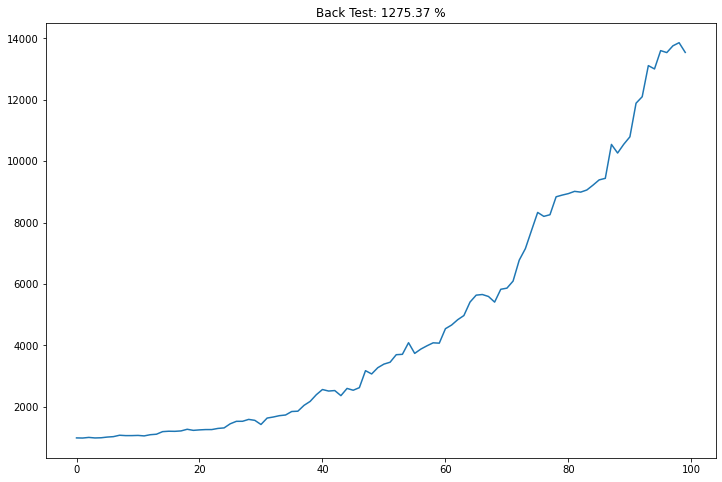

In [24]:
best = result[7][1]
total_profit = (best[-1] - best[0]) / best[0] * 100
plt.figure(figsize=(12,8))
plt.plot(best)
plt.title(f"Back Test: {total_profit:.2f} %")

약 2100%의 수익률을 기록한 것을 확인할 수 있다.

In [38]:
ridge_model.save_model("1d")
lasso_model.save_model("1d")
rf_model.save_model("1d")

이제 4월 달 데이터로 실전을 진행해보자

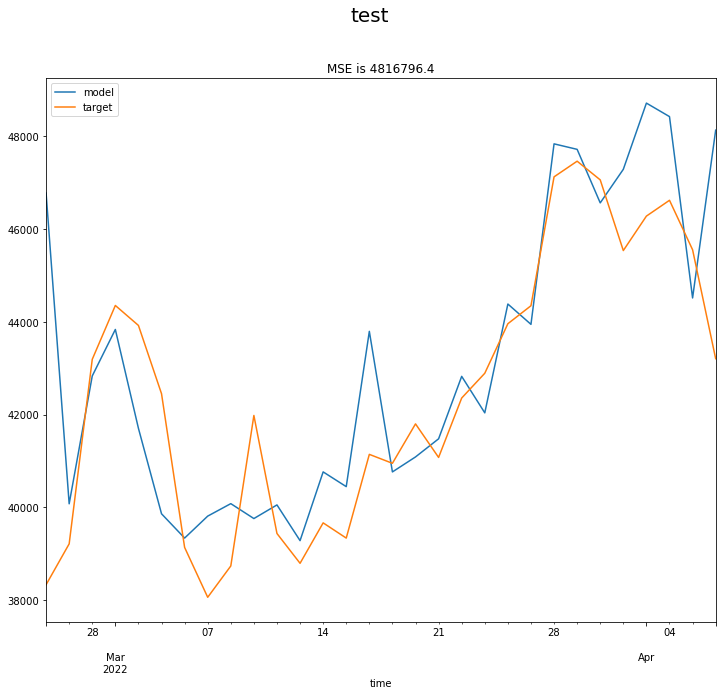

In [25]:
test_pred = total_pred[-30:]
test_y = df['BTC_Price'][-30:]
eval_model.visualize_plot(test_pred, test_y, "test")


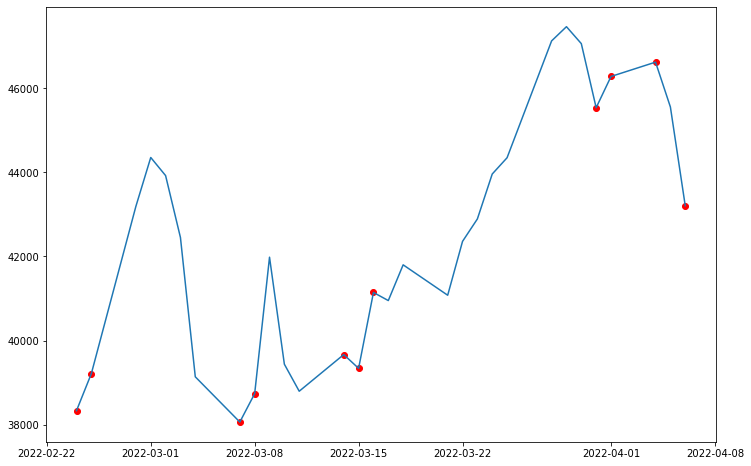

In [26]:
test_buy_point = pct_pred[pct_pred > 2] #2%이상 오를 것이라고 예측한 날들
test_buy_value = test_y[(test_y.index).isin(test_buy_point.index)]
plt.figure(figsize=(12,8))
plt.plot(test_y)
plt.scatter(x=test_buy_value.index, y = test_buy_value.values, c='r')
